# K Nearest Neighbors

K nearest neighbors is another conceptually simple supervised learning approach.

## Algorithm

Given an input i that we want to predict an output for, find the k inputs in the input space most similar to i. Then, average the outputs of those k inputs to predict the output for i. Unlike regression, there is no training phase, since we are not trying to find a function between the input and output spaces. 

The steps for kNN are:

1. Take in a new instance that we want to predict the output for

2. Iterate through the dataset, compiling a set S of the k closest inputs to i

3. Calculate the nearest neighbors response by looking at the corresponding outputs to the inputs in S - average the outputs for regression and take the majority vote for classification.


## Design Decisions

In the basic kNN model, the only decisions we need to make are what to choose for the value of k and how to define the distance between inputs in order to determine our definition of similarity. 

For large values of k we get less distinction between classes, as we are then just averaging over large subsets of the entire dataset. On the other hand, for small values of k, our predictions may be strongly affected by noise. There are several ways to choose the optimal value of k for a given dataset. These methods include k-fold cross validation. 


## Implementation
This is an implementation of regression kNN.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# m is a percent
def split(data, m):
    df_shuffled = data.iloc[np.random.permutation(len(data))]
    df_training = df_shuffled[:int(m/100.0*len(data))]
    df_test = df_shuffled[int(m/100.0*len(data)):]
    return df_training, df_test 

#k nearest neighbors
def knn_predict(k,train,test):
    test_array = test.values
    train_array = train.values
    #create an array of zeros that will be our sum of nearest neighbors
    sum_of_nn = np.zeros(len(test_array))
    #loop through k times, and each time add the test value that corresponds to the kth closest distance to sum_of_nn
    for i in range(k):
        array_closest_i = map(lambda x: np.argsort(abs(x-train_array[:,0]))[i],test_array)
        sum_of_nn += map(lambda x: train_array[x,1],array_closest_i)       
        
    #finally divide by k to get the average
    prediction = sum_of_nn/float(k)
    return pd.DataFrame(np.array([test_array,prediction])).T

Now we'll run kNN with different values of k and observe the results. First, we'll import the data set.

In [ ]:
dataset1 = pd.read_csv('dataset_1_full.txt')
train, test = split(dataset1, 70)
test1 = test.ix[:,0]

In [ ]:
prediction1 = knn_predict(10,train,test1)
prediction1.head()

In [ ]:
prediction2 = knn_predict(20,train,test1)
prediction2.head()

In [ ]:
prediction3 = knn_predict(30,train,test1)
prediction3.head()

As you can see, the results of kNN are heavily dependent on the value for k that you choose. 

## Analysis

kNN is a very easy algorithm to understand. However, there are several major drawbacks. First off, notice that KNN does not find an explicit function mapping inputs to outputs, like regression does. Instead, it searches through the dataset to find the neighbors. This forces us to store the entire training dataset. In addition, the process of traversing the dataset can be very expensive for large datasets. Finally, as we saw earlier, choosing the correct value of k is crucial to getting a high performing algorithm.

## Application

Of course, you won't have to implement the KNN algorithm yourself every time. Like for regression, Scikit-learn has a k nearest neighbors implementation that you can use. It supports kNN regression:

In [ ]:
X = [[0], [1], [2], [3], [4]]
y = [0, 0, 1, 1, 2]
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X, y) 
print(neigh.predict([[1.5]]))

as well as kNN classification: 

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
print(neigh.predict([[1.8]]))

## Challenge: kNN for Digit Classification 

Your challenge is to use kNN for the classification of handwritten digits. We will be using the MNIST dataset of handwritten digits.

Upon getting the dataset, first you should split the data into a training set and testing set. Then, you can convert each of the images to a vector. That allows you to perform kNN on these images to get your predictions on the test set. Finally, compare your predictions to the actual values to determine the accuracy of implementation.

Have fun!

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()

The dataset consists of inputs in digits.images, and outputs in digits.target

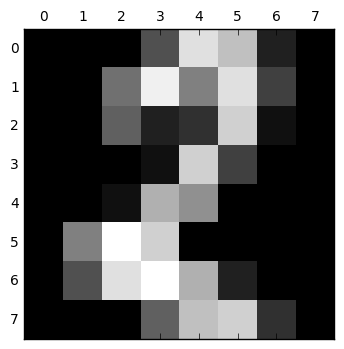

[[  0.   0.   0.   5.  14.  12.   2.   0.]
 [  0.   0.   7.  15.   8.  14.   4.   0.]
 [  0.   0.   6.   2.   3.  13.   1.   0.]
 [  0.   0.   0.   1.  13.   4.   0.   0.]
 [  0.   0.   1.  11.   9.   0.   0.   0.]
 [  0.   8.  16.  13.   0.   0.   0.   0.]
 [  0.   5.  14.  16.  11.   2.   0.   0.]
 [  0.   0.   0.   6.  12.  13.   3.   0.]]
2


In [2]:
plt.gray() 
plt.matshow(digits.images[50]) 
plt.show() 

print(digits.images[50])
print(digits.target[50])